# Course Name: Introduction to Neural Networks
# Project Name: Bank Churn Prediction

Submitted: Manasi Sipani

Date: 2/12/2022

## Problem Definition

The problem today is to help bank management to identify the problem of 'Churn' i.e. customers leaving and joining another service provider, so that bank can understand which aspects of the service influence a customer's decision in this regard. In order to do that, I will begin with exploring and visualizing the dataset, preprocess the data as needed and then build artificial neural network models to identify 'Churn' customers that will help the bank concentrate efforts on the improvement of service.

With this my objective is to generate a set of insights and recommendations that will help the bank,

- To predict whether a given customer will leave/churn or not in the next 6 months
- Understand the difference between such customers
- Use this information to better service the 'Churn' customers.

## Data Information

Data File: Credit Card Customer Churn.csv

The data contains the different attributes of existing bank customers. The detailed data dictionary is given below.

#### Data Description

* The datafile is called: bank.csv 
* The case study is from an open-source dataset from Kaggle. 
* The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

#### Data Dictionary 

- `CustomerId`: Unique ID which is assigned to each customer
-`Surname`: Last name of the customer 
-`CreditScore`: It defines the credit history of the customer.  
-`Geography`: A customer’s location    
-`Gender`: It defines the Gender of the customer   
-`Age`: Age of the customer     
-`Tenure`: Number of years for which the customer has been with the bank
-`NumOfProducts`: It refers to the number of products that a customer has purchased through the bank.
-`Balance`: Account balance
-`HasCrCard`: It is a categorical variable that decides whether the customer has a credit card or not.
-`EstimatedSalary`: Estimated salary 
-`isActiveMember`: It is a categorical variable that decides whether the customer is an active member of the bank or not (Active member in the sense, using bank products regularly, making transactions, etc)
-`Exited`: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
  - 0=No (Customer did not leave the bank)
  - 1=Yes (Customer left the bank)


## Initialize and Preliminary Data Analysis
### Import All Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import scipy.stats as stats 

# Library to split data
from sklearn.model_selection import train_test_split

# Profiling report
from pandas_profiling import ProfileReport

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction

from sklearn import metrics

# to scale the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# to encode the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# to compute distances
from scipy.spatial.distance import cdist

# to build neural networks
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
from pandas_profiling import ProfileReport

# Printing style
from tabulate import tabulate

### Read the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Data = pd.read_csv('/content/drive/MyDrive/Churn.csv')

In [4]:
df=Data.copy() # copying data to another varaible to avoid any changes to original data

### View the first and last 5 rows of the dataset.

In [5]:
df.head() # view top 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


### Understand the shape of the dataset

In [7]:
df.shape # view number of rows and columns
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 10000 rows and 14 columns.


### Check the data types of the columns for the dataset.

In [8]:
df.info() # view info on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations:**
* There are no nulls in the data, so no null treatment is needed.
* Most columns are numeric, except Gender, Geography and Surname.
* Column names need to be standardized.
* RowNumber, CustomerID and Surname look like ID/identity columns and can be used as index or dropped.
* Exited is our dependant variable.

### Summary of the dataset.

In [9]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000,10000.000,10000,10000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.500,15690940.569,NaN,650.529,NaN,NaN,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,NaN,96.653,NaN,NaN,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,NaN,350.000,NaN,NaN,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,NaN,584.000,NaN,NaN,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,NaN,652.000,NaN,NaN,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,NaN,718.000,NaN,NaN,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000


**Observations:**   

* We have 3 customer identification columns, we can drop them before model building.
* CreditScore ranges from 350-850, with more than 50% values below 652.
* There are 3 unique geography values, with more than 5000 customers from France.
* Gender looks well distributed, with males slightly higher than females.
* Age ranges from 18 to 92 with more than 75% cutsomers below the age of 44.
* Tenure with the bank ranges from 0 to 10.
* At least 25% customers have a 0 balance.
* More than 50% customers have a credit card.
* More than 50% customers are active.
* Estimated Salary range from 11-199992 with a median of 100193.
* No of Products range from 1-4 with median being 1 
    - Fewer than 25% customers have more than 2 products.

## Data Preprocessing

### Check for missing values

In [10]:
df.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no missing values in the dataset

### Check for duplicate rows

In [11]:
# checking for duplicate values in the data
df.duplicated().sum()

0

* There are no duplicate rows in our dataset.

### Check for unique values

In [12]:
df.nunique().sort_values(ascending=True)

Gender                 2
HasCrCard              2
IsActiveMember         2
Exited                 2
Geography              3
NumOfProducts          4
Tenure                11
Age                   70
CreditScore          460
Surname             2932
Balance             6382
EstimatedSalary     9999
RowNumber          10000
CustomerId         10000
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations:**   

* RowNumber and CustomerID both are unique and ID fields. They will not be needed for our further analysis so we will drop these columns.
* Surname is an identity field too and has nearly 3000 unique names for customers. These will lead to profiling so we will drop this column too.
* Estimated Salary has 9999 unique values. That shows almost all the rows have unique salary. Perhaps there was a algorithm used to estimate salary for these customers.

#### Drop ID columns and profiling columns as it is not needed for further analysis

In [14]:
df.drop(['RowNumber'],axis=1,inplace=True)
df.drop(['CustomerId'],axis=1,inplace=True)
df.drop(['Surname'],axis=1,inplace=True)

In [15]:
# checking for duplicate values in the data after dropping clientnum
df.duplicated().sum()

0

**Observations:**  

* Even after dropping ID columns, there are no duplicates.

### Standardizing Column Names

In [16]:
def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

In [17]:
df = feature_name_standardize(df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* All the columns are standardized now.

**Observations**

Based on data review, there are few takeaways:

- The data for columns like balance and credit score appear to be at a point of time when data was sourced, so the date will have some implication to our analysis and prediction which is unknown.
- The data for estimated salary has 9999 unique values, so how is it sourced - it appears to become like a profiling attribute rather than a data point so the impact to the model will need to be checked.
- There are customers who have exited but still have a balance in their account. Are they still customers?
- What does being an active member mean is not clear. Are there various levels of engagement?
  
**Better data sourcing recommendation for business**
- It is better to obtain average or over a period of time data points as opposed to data at a point of time.
- It is better to provide more clarity on isactive in terms of activity, level, type etc.
- A break down of the products bought by a customer could provide more insight into their preferences


```

```

For now will proceed to analysis and model but having thorough clarity on the data points and better data context from better understanding of the data extraction process would provide better insight and possibly lead to better results from the machine learning process.

## Exploratory Data Analysis

## Univariate Analysis

### Using boxplot and histplot for each numerical variables to make observations.

In [19]:
# Pairplot is showing few columns have extreme outliers. 
# So cycling through all the numerical columns and plotting the box plot.
# Also plotting histograms showing mean and medians.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observation on creditscore

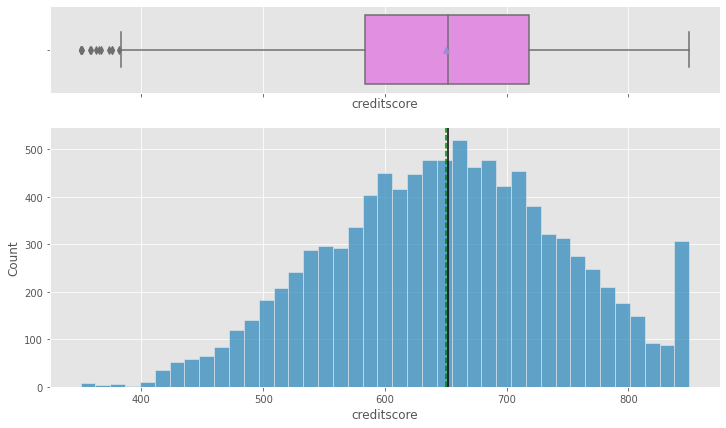

In [20]:
histogram_boxplot(df, "creditscore")

* Fairly normal distribution with 1 big spike at max level.
* There are few outliers on left.

### Observation on age


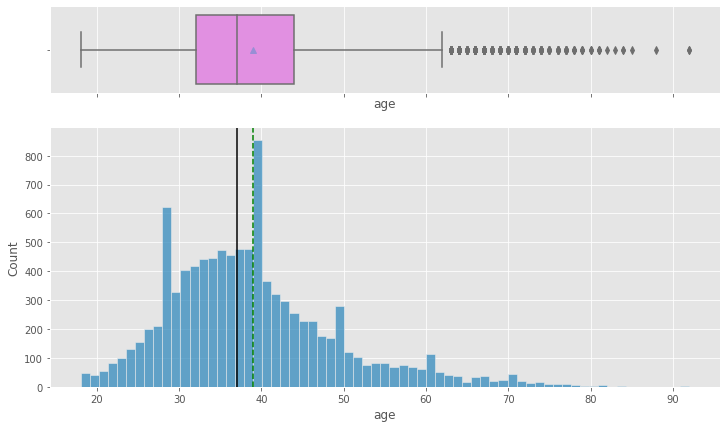

In [21]:
histogram_boxplot(df, "age")

* Slight right skewed distribution with few spikes in between.
* There are some serious outliers on higher side.

### Observation on tenure

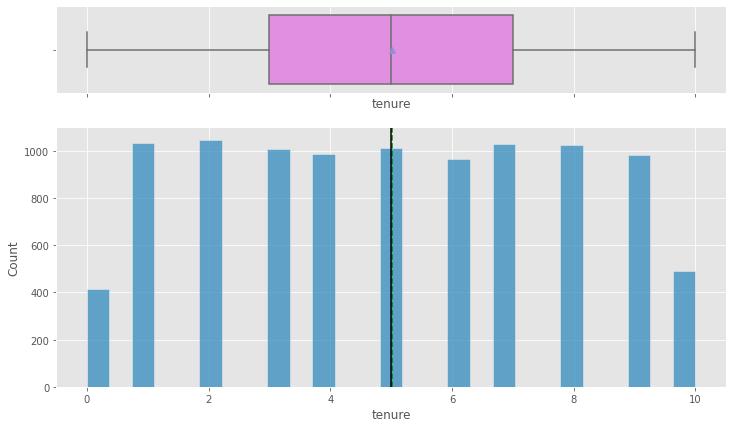

In [22]:
histogram_boxplot(df, "tenure")

* Fairly uniform distribution with no outliers.

### Observation on balance

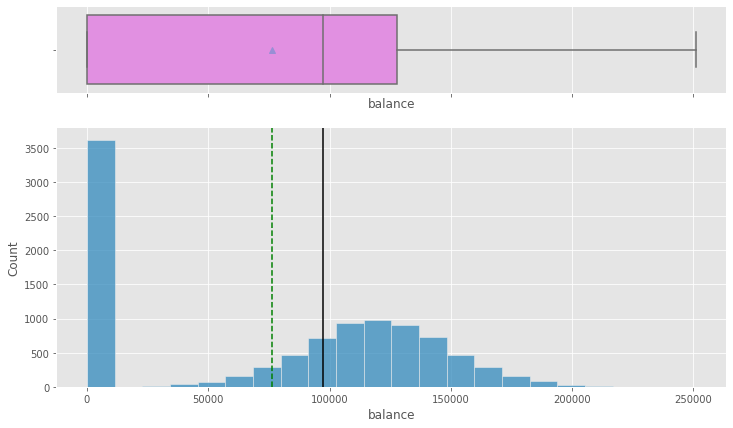

In [23]:
histogram_boxplot(df, "balance")

* Normal distribution with a big spikes at 0 level.
* There are no outliers.

### Observation on numofproducts

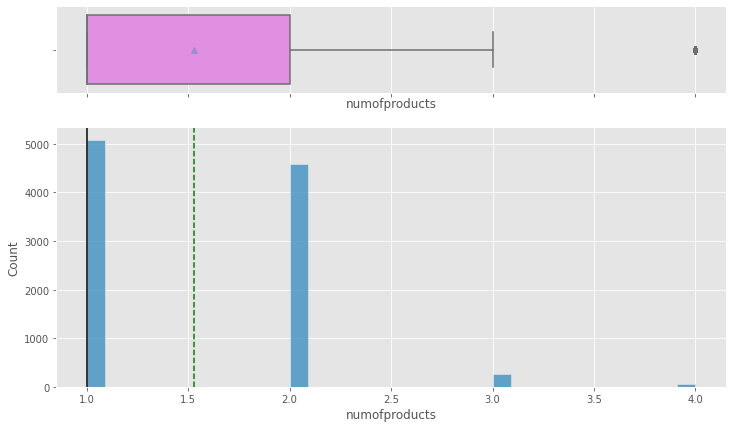

In [24]:
histogram_boxplot(df, "numofproducts")

* Customers are usually having 1 or 2 products.
* Having 4 products is an outlier in the data.

### Observation on estimatedsalary

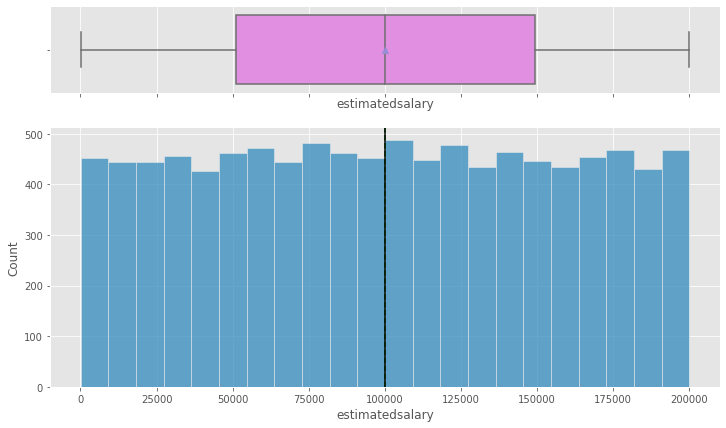

In [25]:
histogram_boxplot(df, "estimatedsalary")

* Fairly uniform distribution
* Looks like data source provided curated data for this column.

### Using barplot for each categorical variables to make observations.

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Creating salary bins

In [27]:
df['salary_bin'] = pd.cut(df['estimatedsalary'], bins=[0,50000,100000,150000,200000]
                                ,labels=['Low', 'Med', 'High', 'Very High'], include_lowest=True)

### Observation on salary bins

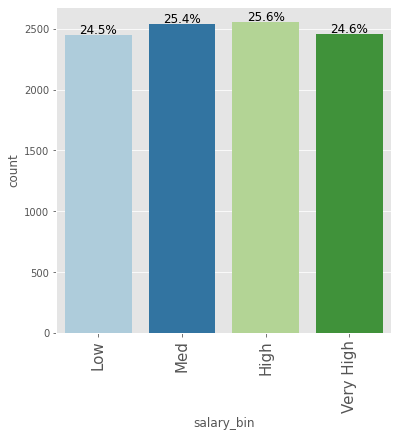

In [28]:
labeled_barplot(df, "salary_bin", perc=True)

* Data for the 4 bins are pretty uniform.
* We will do some bivariate analysis later to look for insights

### Creating balance bins

In [29]:
df['balance_bin'] = pd.cut(df['balance'], bins=[0,100000,200000,300000]
                                ,labels=['Low', 'Med', 'High'], include_lowest=True)

### Observation on balance bins

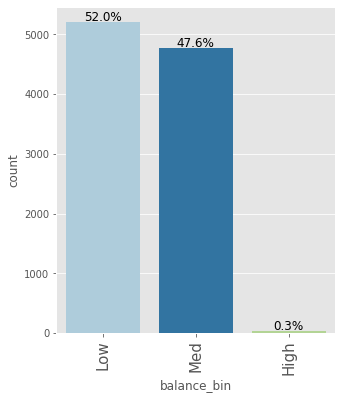

In [30]:
labeled_barplot(df, "balance_bin", perc=True)

* Nearly 52% customers have a low balance
* Only 0.3% customers have a high balance

### Observation on geography

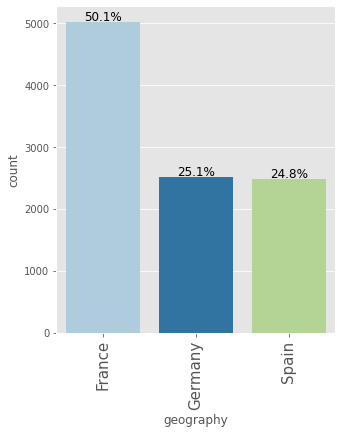

In [31]:
labeled_barplot(df, "geography", perc=True)

* Half of the customers are from France and quarter each for Germany and Spain.

### Observation on gender

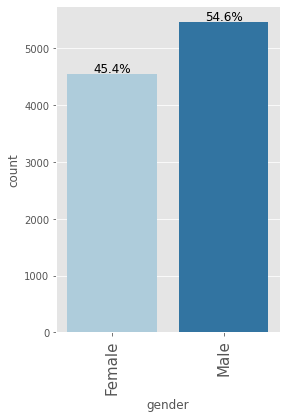

In [32]:
labeled_barplot(df, "gender", perc=True)

* There are more male customers than females

### Observation on hascrcard

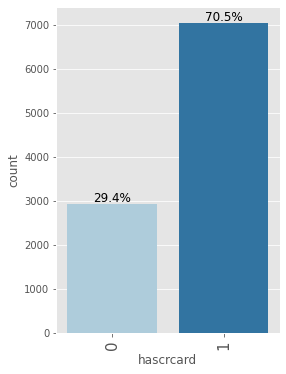

In [33]:
labeled_barplot(df, "hascrcard", perc=True)

* Most customers (~70.5%) have credit cards.

### Observation on isactivemember

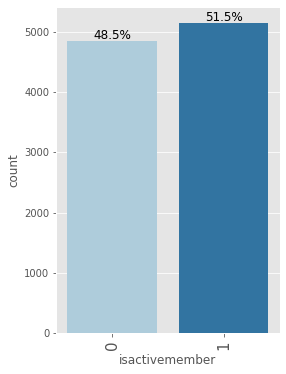

In [34]:
labeled_barplot(df, "isactivemember", perc=True)

* ~51.5% customers are active vs ~48.5% that aren't.

0    7963
1    2037
Name: exited, dtype: int64


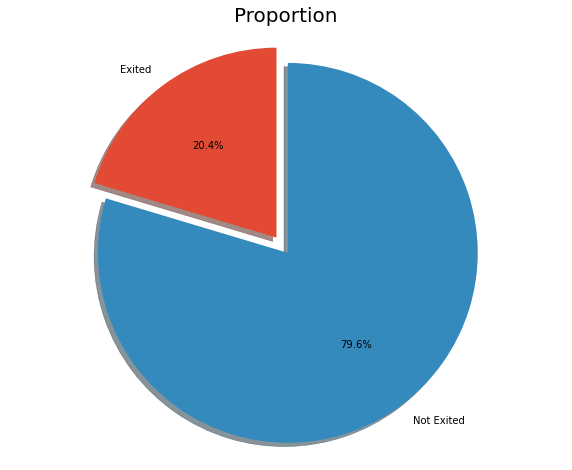

In [35]:
print(df.exited.value_counts())
labels = 'Exited', 'Not Exited'
sizes = [df.exited[df['exited']==1].count(),df.exited[df['exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~20.4% of the customers in this dataset have exited.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

## Bivariate & Multivariate Analysis

**Plot the distribution plots for all the numerical features to make observations.**

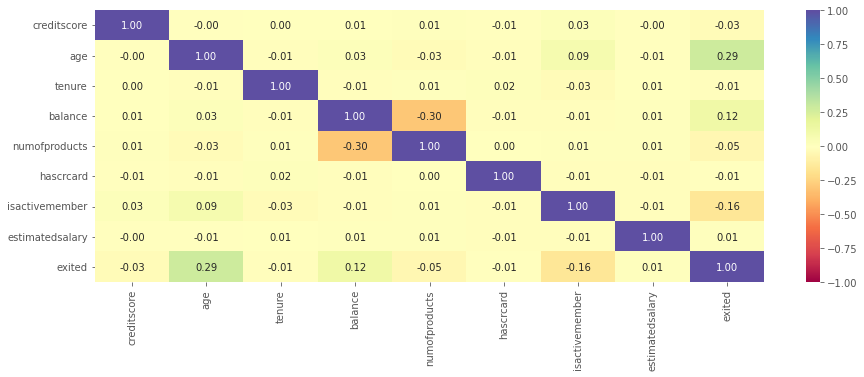

In [36]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

* numofproducts is negatively correlated to balance.
* age has a positive correlation with output variable exited.
* isactivemember and exited are negatively correlated.
* balance and exited are positively correlated.

In [37]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

exited     0     1    All
gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


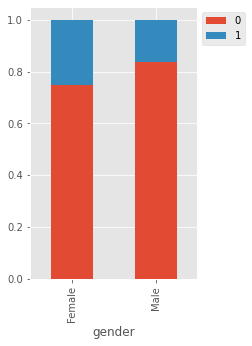

In [38]:
stacked_barplot(df, "gender", "exited")

* Females are more likely to churn than males. 



exited        0     1    All
geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


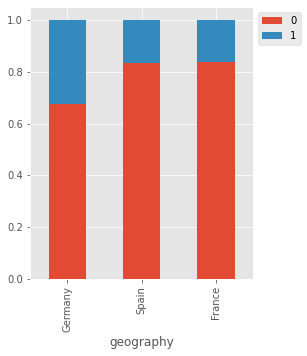

In [39]:
stacked_barplot(df, "geography", "exited")

* German customers are more likely to churn than others. 



exited            0     1    All
numofproducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


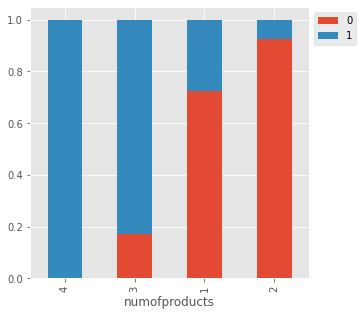

In [40]:
stacked_barplot(df, "numofproducts", "exited")

* Data shows that the customers with 4 products always exit the bank and 3 cards are very likey to churn as well.



exited             0     1    All
isactivemember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


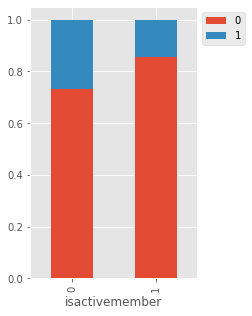

In [41]:
stacked_barplot(df, "isactivemember", "exited")

* Non active members are more likely to churn than active ones. 



exited     0     1    All
gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


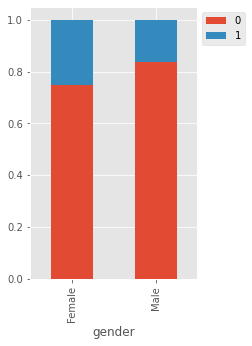

In [42]:
stacked_barplot(df, "gender", "exited")

* Females are more likely to churn than males. 



exited     0     1    All
tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


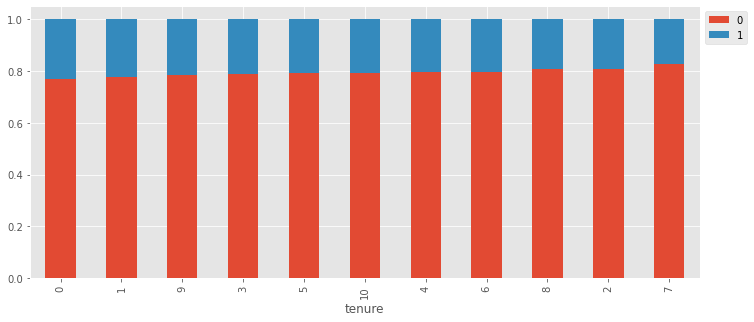

In [43]:
stacked_barplot(df, "tenure", "exited")

* Tenure does not really impact customer churn.



exited          0     1    All
balance_bin                   
All          7963  2037  10000
Med          3573  1192   4765
Low          4375   826   5201
High           15    19     34
------------------------------------------------------------------------------------------------------------------------


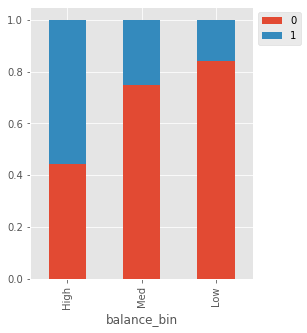

In [44]:
stacked_barplot(df, "balance_bin", "exited")

* Customers with a high balance are likely to churn.



In [45]:
# Function to plot numerical feature by each category with target hue

def plot_numeric_by_cat(data: pd.DataFrame, category_columns: list, numeric_column: str, hue: str = None):
    '''
    The function plots a numerical feature in box plot by every category column specified in the list, 
    with hue of a target category
    '''
    num_cols = 2
    num_rows = int(len(category_columns) /2 + 1)

    plt.figure(figsize=(20, 8*num_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.set(palette="nipy_spectral");
        sns.boxplot(data=data, x=col, y=numeric_column, hue=hue, showfliers=True).set(title = numeric_column + ' vs. ' + col );

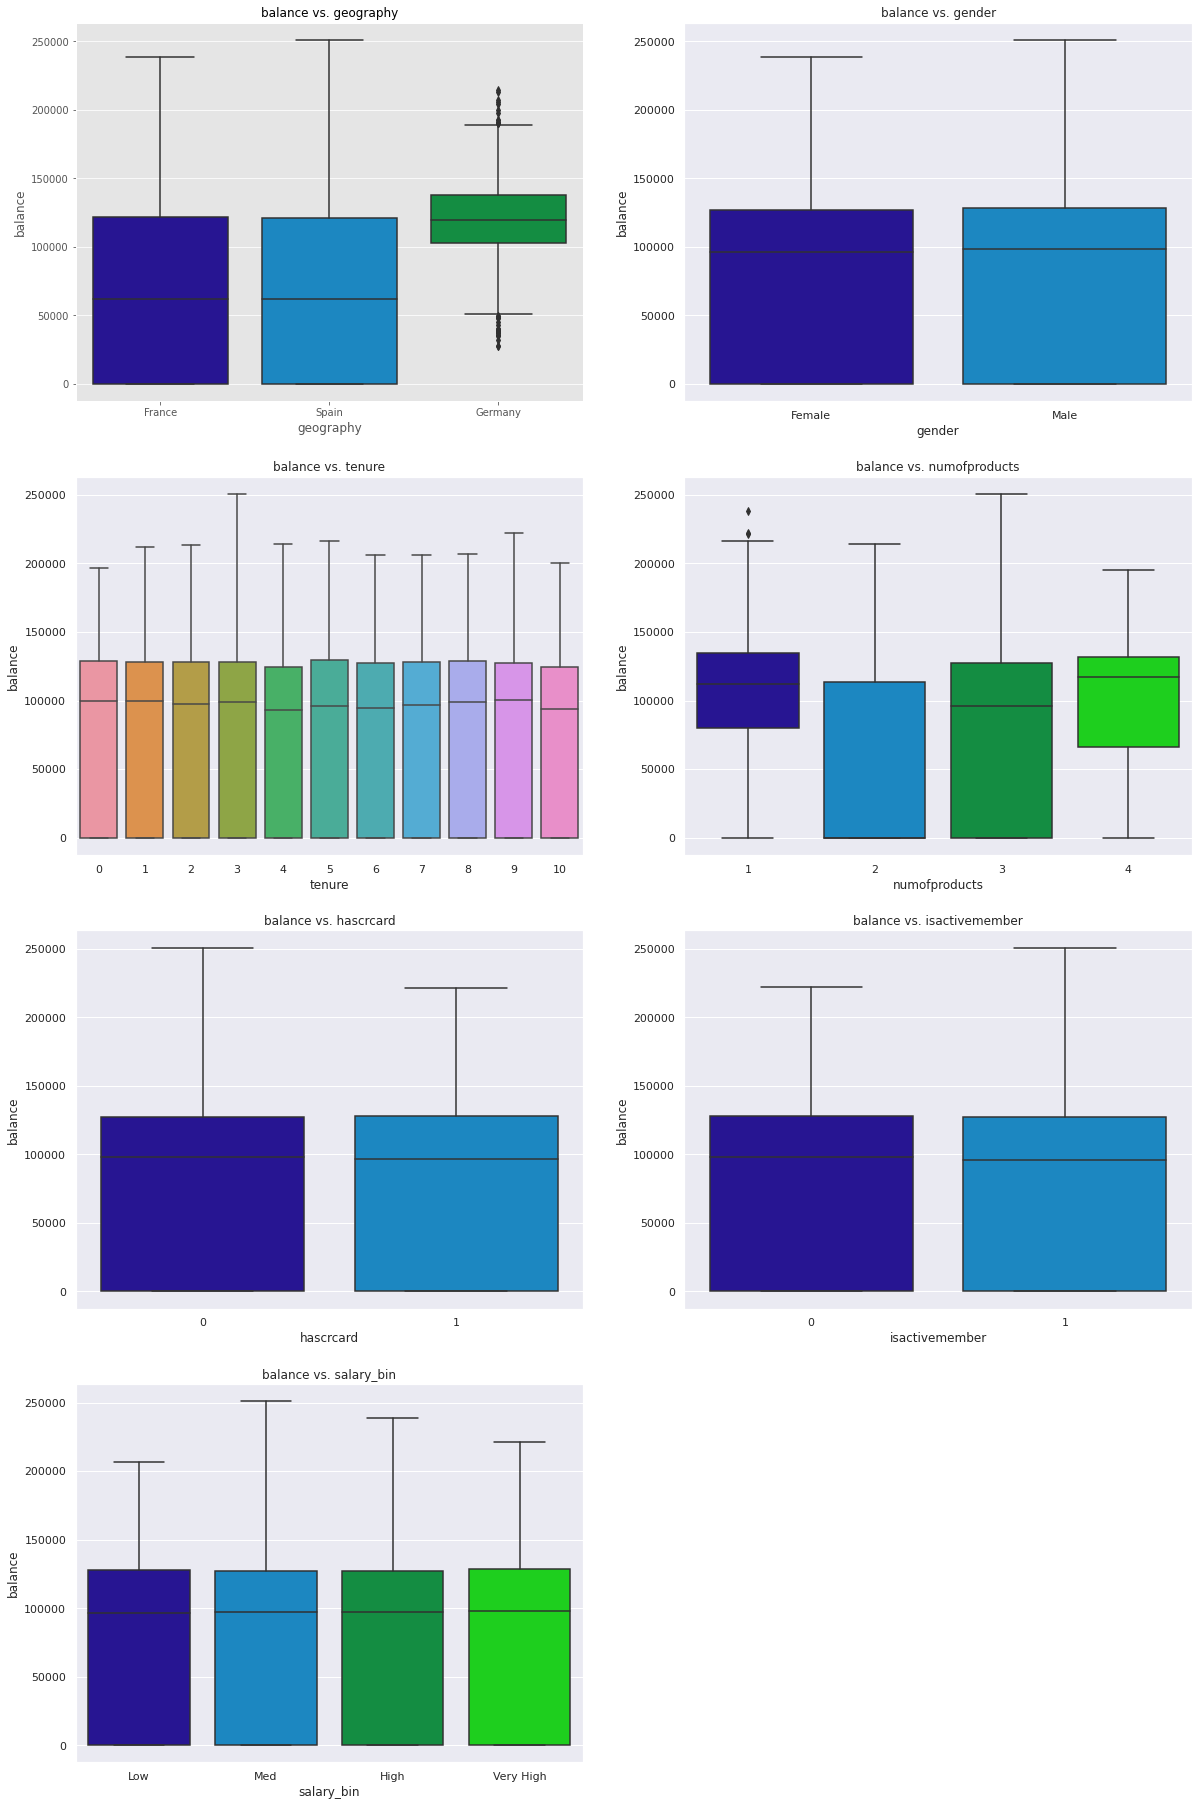

In [46]:
plot_numeric_by_cat(df\
                    ,category_columns=['geography','gender','tenure','numofproducts','hascrcard','isactivemember','salary_bin']\
                    ,numeric_column='balance')

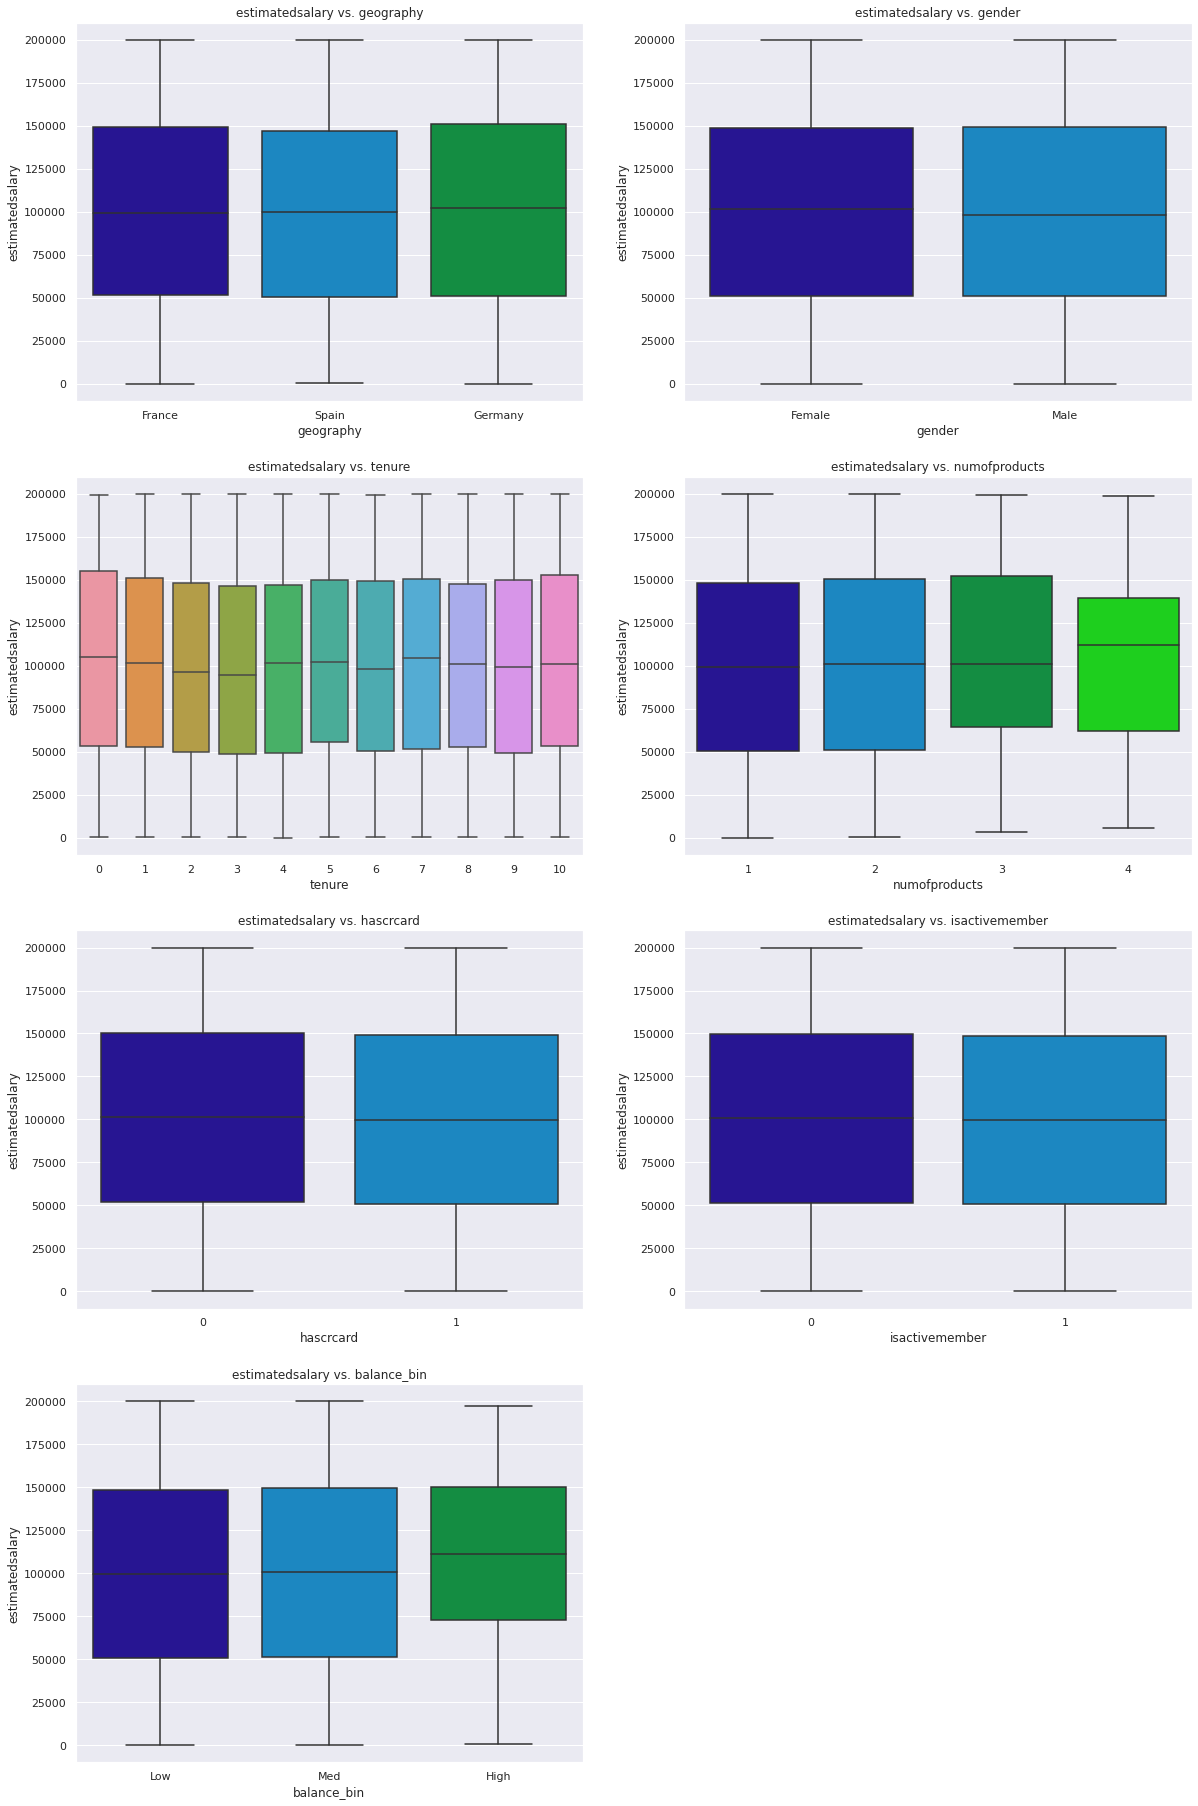

In [47]:
plot_numeric_by_cat(df\
                    ,category_columns=['geography','gender','tenure','numofproducts','hascrcard','isactivemember','balance_bin']\
                    ,numeric_column='estimatedsalary')

* Germany customers have a higher balance than either of the other countries.
* Customers with higher balance have a higher median salary than customers with medium or lower balance. 

## Multi-variate Plots

<Figure size 1440x1440 with 0 Axes>

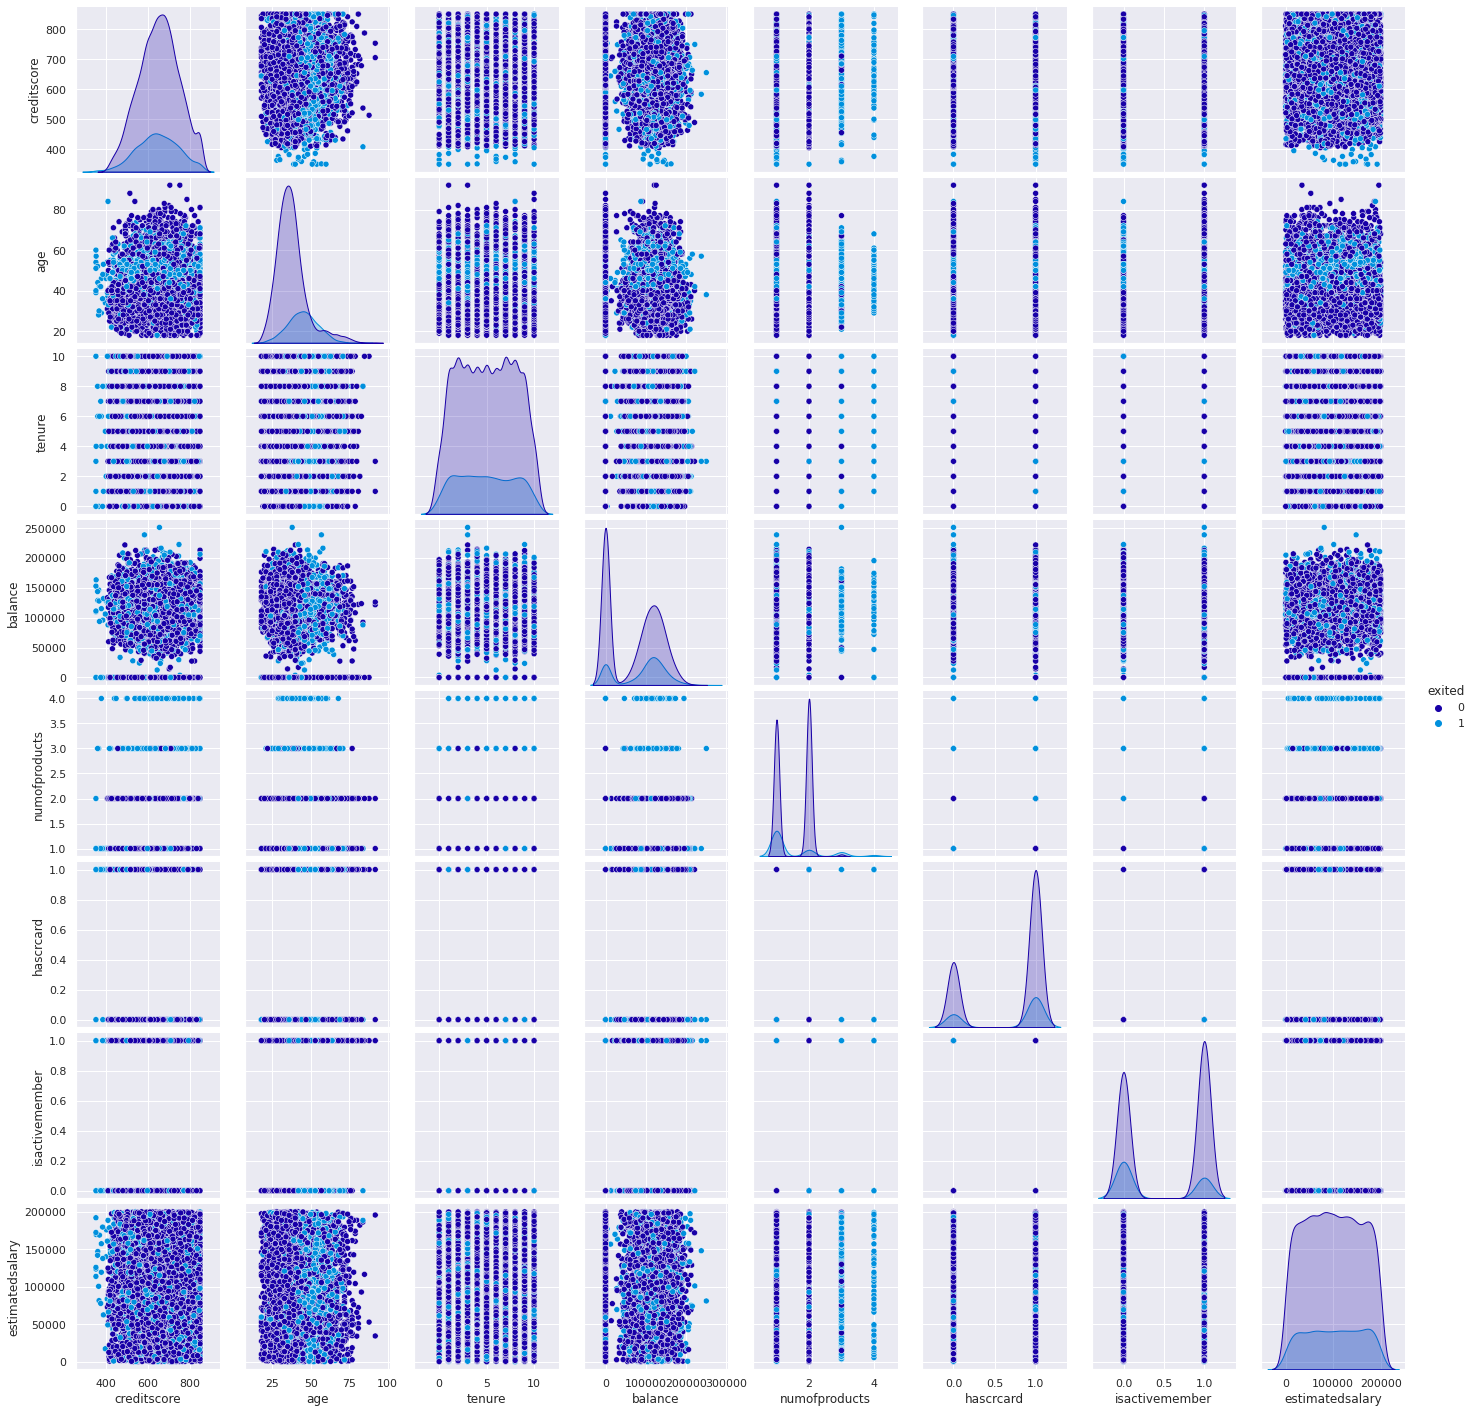

In [48]:
# Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20, 20))
sns.set(palette="nipy_spectral")
sns.pairplot(data=df, hue="exited")


* Following are the possible indicators of potential customer churn,
    * credit card customers with a low credit score,
    * relatively  younger, and newer customers,
    * with lower account balance and estimated salary,
    * more inactivity and having fewer number of products.


## Insights based on EDA

### Customer Profile Observations

* There appears to be at least 2 broad customer profiles based on the EDA

  * Low Profile Group who are likely to churn

      * Customers with lower account balance of 35k or less
      * Lower estimated salary of less than 45k
      * Relatively inactive
      * Own fewer number of products
      * Own a credit card 
      * And have a low credit score of 450 or less
      * They are relatively  less than 30 years of age
      * And also have a lesser than 2 years tenure with the bank. 

  * High Profile Group who are not so likely to churn
      * Customers with higher account balance of 35k or more
      * Higher estimated salary of more than 45k
      * Relatively active
      * Own more than 1 product
      * Do not own a credit card 
      * And have a high credit score of 450 or more
      * They are relatively  more than 30 years of age
      * And also have a more than 2 years tenure with the bank. 
         

## More data pre-processing

**Now we will prepare data for model building.**

**Pre-processing steps**

* Dropping analysis columns like balance_bin and salary_bin
* Creating dummy for categorical columns
* Split into dependant and independant data
* Split to Train and Test sets
* Scaling the data
    - We will scale the data for uniformity 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   creditscore      10000 non-null  int64   
 1   geography        10000 non-null  object  
 2   gender           10000 non-null  object  
 3   age              10000 non-null  int64   
 4   tenure           10000 non-null  int64   
 5   balance          10000 non-null  float64 
 6   numofproducts    10000 non-null  int64   
 7   hascrcard        10000 non-null  int64   
 8   isactivemember   10000 non-null  int64   
 9   estimatedsalary  10000 non-null  float64 
 10  exited           10000 non-null  int64   
 11  salary_bin       10000 non-null  category
 12  balance_bin      10000 non-null  category
dtypes: category(2), float64(2), int64(7), object(2)
memory usage: 879.4+ KB


In [50]:
df = df.drop(["salary_bin"], axis=1)
df = df.drop(["balance_bin"], axis=1)

In [51]:
#creating dummy variables for the categorical features
df = pd.get_dummies(df,drop_first=True)
df = df.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
df

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.883,1.000,0.000,0.000,0.000
1,608.000,41.000,1.000,83807.859,1.000,0.000,1.000,112542.578,0.000,0.000,1.000,0.000
2,502.000,42.000,8.000,159660.797,3.000,1.000,0.000,113931.570,1.000,0.000,0.000,0.000
3,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.633,0.000,0.000,0.000,0.000
4,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.102,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.000,39.000,5.000,0.000,2.000,1.000,0.000,96270.641,0.000,0.000,0.000,1.000
9996,516.000,35.000,10.000,57369.609,1.000,1.000,1.000,101699.773,0.000,0.000,0.000,1.000
9997,709.000,36.000,7.000,0.000,1.000,0.000,1.000,42085.578,1.000,0.000,0.000,0.000
9998,772.000,42.000,3.000,75075.312,2.000,1.000,0.000,92888.523,1.000,1.000,0.000,1.000


##Separating Independant and Dependant Columns

In [52]:

## Separating Independent and Dependent Columns
X = df.drop(['exited'],axis=1)
Y = df[['exited']]

##Splitting the train and test data

In [53]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
#Splitting the train set into  dev set and training set
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

##Normalizing the train and test data separately

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting an customer is looking to churn, when he/she is not looking for it. 
* Predicting an customer is not looking to churn, when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. 

* Not giving a chance to a dissatisfied customer(by wrongly classifying them as not likely to churn) might lead to churn, and the company might lose a good customer affecting the bank's revenue. 
* However, giving perks to a satisfied customer (as they are likely to churn) would lead to a financial loss for the bank.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives? and increase True Negatives and True Positives**

Since both errors are important for us to minimize, the company would want the Accuracy and F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the Accuracy and F1 score rather than focusing on just one metric i.e. Recall or Precision.

## **Build Neural Networks**

#### **Aim is to create multiple ANN for model performance improvement**
* We will build several models using the tools available in ANN course like
  - Hidden Layers
  - Activation functions
  - Dropout
  - Batch Normalization
  - Hyperparameter tuning
  - Using tuners
  - Using SMOTE to balance the data and then build models

### Model 1


In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [56]:
# Initializing the ANN
model = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [57]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5200 - accuracy: 0.7881 - val_loss: 0.4737 - val_accuracy: 0.7987
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7991 - val_loss: 0.4494 - val_accuracy: 0.8025
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8044 - val_loss: 0.4355 - val_accuracy: 0.8094
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8106 - val_loss: 0.4265 - val_accuracy: 0.8150
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8159 - val_loss: 0.4202 - val_accuracy: 0.8175
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8209 - val_loss: 0.4147 - val_accuracy: 0.8231
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8258 - val_loss: 0.4101 - val_accuracy: 0.8244
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8600


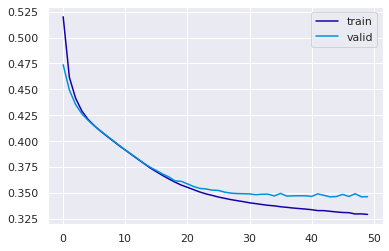

In [59]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [60]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [61]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

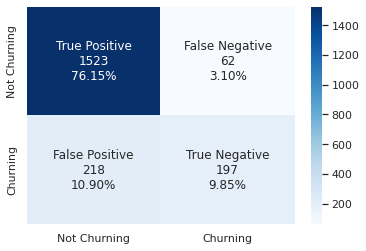

In [62]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [63]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1585
         1.0       0.76      0.47      0.58       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



**Observation on Model 1**

Basic model with 1 hidden layer using 2881 parameters gave an accuracy of 86% and F1 score of 58%, with a false positive rate of ~10.45%

Next lets try and increase hidden layers, and initialize the weights to see if that helps get better performance.

As you can see, the above model has a good accuracy but a poor F1-score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower. 

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2

In [64]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [65]:
model1 = Sequential()
#Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [66]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [67]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4327 - accuracy: 0.8148 - val_loss: 0.3656 - val_accuracy: 0.8456
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0.8511 - val_loss: 0.3738 - val_accuracy: 0.8375
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.8589 - val_loss: 0.3662 - val_accuracy: 0.8481
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.8633 - val_loss: 0.3656 - val_accuracy: 0.8425
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3222 - accuracy: 0.8666 - val_loss: 0.3709 - val_accuracy: 0.8462
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8702 - val_loss: 0.3656 - val_accuracy: 0.8469
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.8709 - val_loss: 0.3733 - val_accuracy: 0.8425
Epoch 

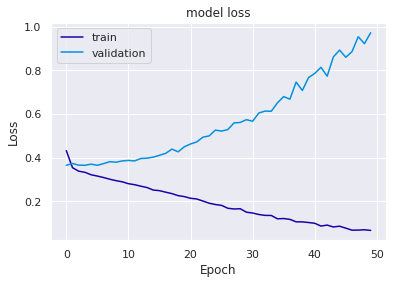

In [68]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.010079, G-Mean=0.726


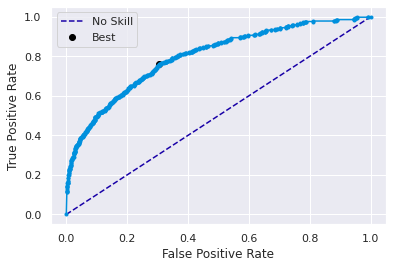

In [69]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [70]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

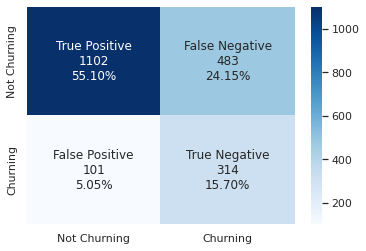

In [71]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [72]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.70      0.79      1585
         1.0       0.39      0.76      0.52       415

    accuracy                           0.71      2000
   macro avg       0.66      0.73      0.65      2000
weighted avg       0.81      0.71      0.73      2000



**Observation on Model 2**

Basic model with 3 hidden layer using 46331 parameters gave a reduced accuracy of 71% and F1 score of 52%, and a reduction in false positive rate of ~5.05% from previous model.

Next lets try and introduce batch normalization to regularize, and initialize the weights to see if that helps get better fit.

### Model 3

In [73]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [74]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [75]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [76]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [77]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 8ms/step - loss: 0.4840 - accuracy: 0.7700 - val_loss: 0.4504 - val_accuracy: 0.8350
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3679 - accuracy: 0.8484 - val_loss: 0.3775 - val_accuracy: 0.8456
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.8603 - val_loss: 0.3671 - val_accuracy: 0.8431
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8631 - val_loss: 0.3562 - val_accuracy: 0.8462
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.8647 - val_loss: 0.3601 - val_accuracy: 0.8475
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.8677 - val_loss: 0.3589 - val_accuracy: 0.8431
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8717 - val_loss: 0.3608 - val_accuracy: 0.8438
Epoch 

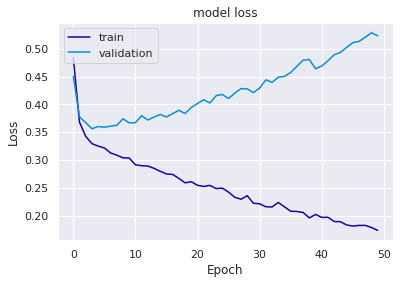

In [78]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.209433, G-Mean=0.747


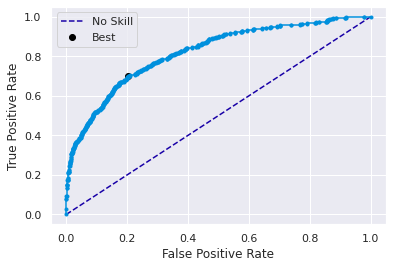

In [79]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [80]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

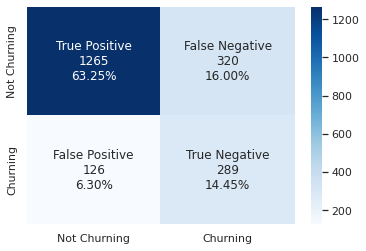

In [81]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [82]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      1585
         1.0       0.47      0.70      0.56       415

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.79      2000



**Observation on Model 3**

Basic model with 2 hidden layer using batch normalization gave a reduced accuracy of 78% and F1 score of 56%, and a increase in false positive rate of ~6.3% from previous model.

The model continues to show signs of overfit.

### Model 4

In [83]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [84]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [85]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [86]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [87]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 0.4688 - accuracy: 0.7900 - val_loss: 0.4190 - val_accuracy: 0.8181
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8303 - val_loss: 0.3652 - val_accuracy: 0.8462
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8528 - val_loss: 0.3566 - val_accuracy: 0.8487
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8517 - val_loss: 0.3563 - val_accuracy: 0.8431
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3557 - accuracy: 0.8558 - val_loss: 0.3523 - val_accuracy: 0.8481
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.8548 - val_loss: 0.3470 - val_accuracy: 0.8500
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3428 - accuracy: 0.8625 - val_loss: 0.3501 - val_accuracy: 0.8462
Epoch 

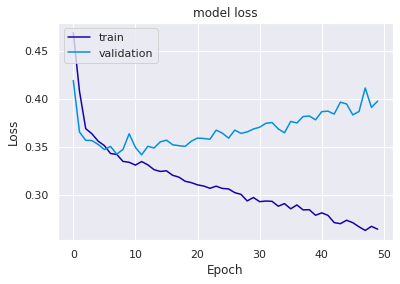

In [88]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.218703, G-Mean=0.770


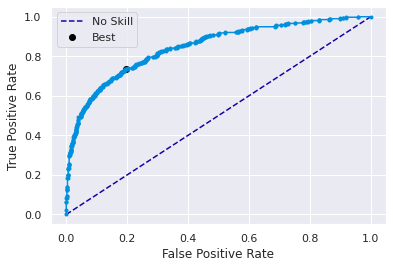

In [89]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [90]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

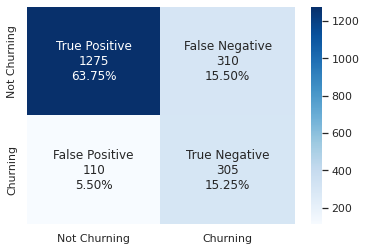

In [91]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [92]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      1585
         1.0       0.50      0.73      0.59       415

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.79      0.80      2000



**Observation on Model 4**

The model with 3 hidden layer using dropout gave an accuracy of 79%, and a decrease in false positive rate of ~5.5% from previous model.

Model is slightly better than earlier one but there is still too much overfit.

Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

### Model 5

In [93]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [94]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**. 
We can also optimize other hyperparameters as mentioned above.

In [95]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [96]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 6ms/step - loss: 0.4542 - accuracy: 0.8044 - val_loss: 0.3990 - val_accuracy: 0.8331
Best: 0.835500 using {'lr': 0.01, 'batch_size': 64}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [97]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [98]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [99]:
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4499 - accuracy: 0.8134 - val_loss: 0.3738 - val_accuracy: 0.8406
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8403 - val_loss: 0.3770 - val_accuracy: 0.8344
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8498 - val_loss: 0.3683 - val_accuracy: 0.8487
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3714 - accuracy: 0.8478 - val_loss: 0.3717 - val_accuracy: 0.8431
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3726 - accuracy: 0.8545 - val_loss: 0.3611 - val_accuracy: 0.8475
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3579 - accuracy: 0.8573 - val_loss: 0.3494 - val_accuracy: 0.8475
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.8598 - val_loss: 0.3532 - val_accuracy: 0.8450
Epoch 

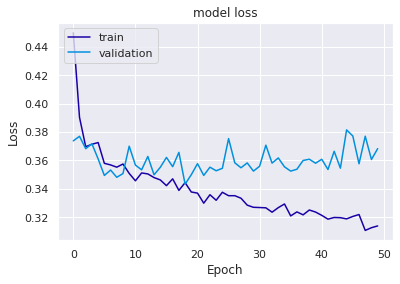

In [100]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Overfit is reduced but the loss is still choppy which shows noise in the model.

Best Threshold=0.269067, G-Mean=0.769


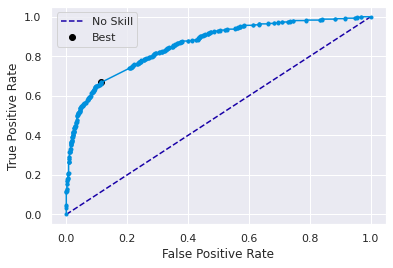

In [101]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [102]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

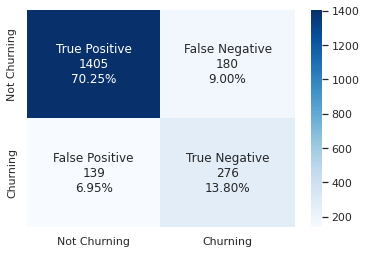

In [103]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [104]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1585
         1.0       0.61      0.67      0.63       415

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.84      2000



**Observation on Model 5**

This model with 3 hidden layer using 46337 parameters with dropouts gave a better accuracy of 84% and F1 score of 63%, and a increase in false positive rate of ~6.95% from previous model.

There is reduction in overfit too after tuning the parameters. We will continue to tweak the model some more.

Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time. 

Other hyperparameters can also be tuned to get better performance on the metrics. 

Here, the F1 score of the model has decreased in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration. 

Let's use the more exhaustive Grid Search CV and see if the F1 score increases. 

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [105]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [106]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [107]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [108]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 5ms/step - loss: 0.4553 - accuracy: 0.8053 - val_loss: 0.4044 - val_accuracy: 0.8188
Best: 0.839125 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 35.44988965988159


In [109]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [110]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4499 - accuracy: 0.8134 - val_loss: 0.3738 - val_accuracy: 0.8406
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8403 - val_loss: 0.3770 - val_accuracy: 0.8344
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8498 - val_loss: 0.3683 - val_accuracy: 0.8487
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3714 - accuracy: 0.8478 - val_loss: 0.3717 - val_accuracy: 0.8431
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3726 - accuracy: 0.8545 - val_loss: 0.3611 - val_accuracy: 0.8475
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.8573 - val_loss: 0.3494 - val_accuracy: 0.8475
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.8598 - val_loss: 0.3532 - val_accuracy: 0.8450
Epoch 

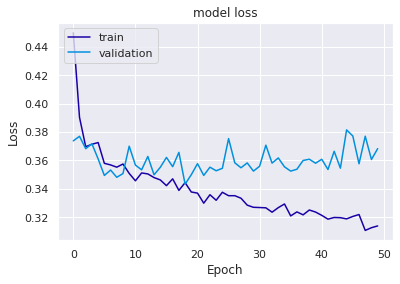

In [111]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.269067, G-Mean=0.769


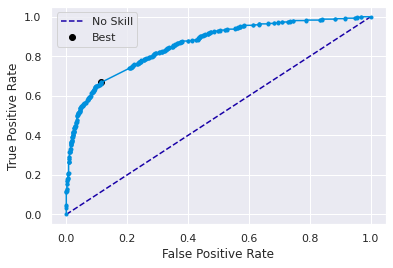

In [112]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [113]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

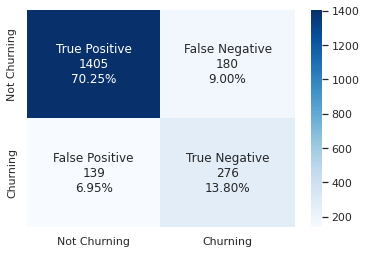

In [114]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [115]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1585
         1.0       0.61      0.67      0.63       415

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.84      2000



**Observation on Model 6**

This model with 3 hidden layer using dropout gave a reduced accuracy of 84%, and a increase in false positive rate of ~6.95% from previous model.

### Keras Tuner

In [116]:
#!pip install keras-tuner

In [117]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [118]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [119]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [120]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Oracle from existing project ./Job_/oracle.json
INFO:tensorflow:Reloading Tuner from ./Job_/tuner0.json


In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [122]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [123]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8493750095367432
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8489583532015482
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8489583333333334
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8477083245913187
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
l

### Model 7

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [124]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [125]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [126]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [127]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trai

In [128]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 0.4164 - accuracy: 0.8289 - val_loss: 0.3786 - val_accuracy: 0.8381
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3553 - accuracy: 0.8534 - val_loss: 0.3641 - val_accuracy: 0.8431
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3338 - accuracy: 0.8631 - val_loss: 0.3783 - val_accuracy: 0.8350
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3238 - accuracy: 0.8652 - val_loss: 0.3797 - val_accuracy: 0.8406
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3093 - accuracy: 0.8748 - val_loss: 0.3831 - val_accuracy: 0.8394
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3034 - accuracy: 0.8741 - val_loss: 0.3792 - val_accuracy: 0.8456
Epoch 7/50
100/100 [==============================] - 1s 8ms/step - loss: 0.2923 - accuracy: 0.8789 - val_loss: 0.3890 - val_accuracy: 0.8444
Epoch 

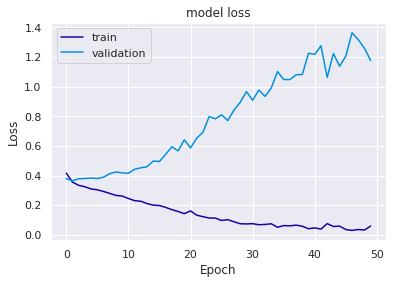

In [129]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Looks like this model has gone towards overfitting again.

Best Threshold=0.030261, G-Mean=0.723


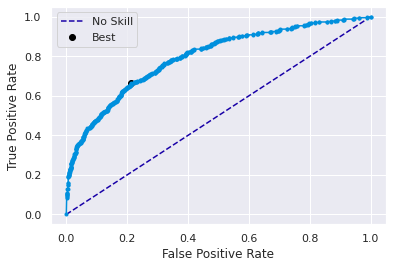

In [130]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [131]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

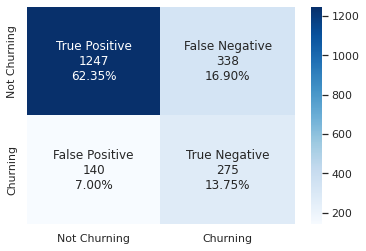

In [132]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [133]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      1585
         1.0       0.45      0.66      0.54       415

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.69      2000
weighted avg       0.81      0.76      0.78      2000



**Observation on Model 7**

Basic model with 3 hidden layer using 121665 parameters gave a reduced accuracy of 76%, and a increase in false positive rate of ~7.0% from previous model.


* After using the suggested hyperparameters from Keras Tuner, the F1 score has slightly increased, and the False Negative rate is higher in comparison to the previous optimization technique model.

* Further, you can add Batch Normalization and Dropout to the model and check the F1 score. 

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [134]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [135]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [136]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [137]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Oracle from existing project ./Job_Switch/oracle.json
INFO:tensorflow:Reloading Tuner from ./Job_Switch/tuner0.json


In [138]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [139]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [140]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7664576768875122
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.7535266280174255
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.750653088092804
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.7446447213490804
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
l

### Model 8

In [141]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [142]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 2s 7ms/step - loss: 0.4750 - accuracy: 0.7693 - val_loss: 0.5462 - val_accuracy: 0.7292
Epoch 2/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4111 - accuracy: 0.8096 - val_loss: 0.5621 - val_accuracy: 0.7190
Epoch 3/50
160/160 [==============================] - 1s 6ms/step - loss: 0.3857 - accuracy: 0.8222 - val_loss: 0.5184 - val_accuracy: 0.7379
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 0.3561 - accuracy: 0.8343 - val_loss: 0.4286 - val_accuracy: 0.7962
Epoch 5/50
160/160 [==============================] - 1s 6ms/step - loss: 0.3417 - accuracy: 0.8438 - val_loss: 0.4679 - val_accuracy: 0.7786
Epoch 6/50
160/160 [==============================] - 1s 6ms/step - loss: 0.3156 - accuracy: 0.8585 - val_loss: 0.3549 - val_accuracy: 0.8652
Epoch 7/50
160/160 [==============================] - 1s 6ms/step - loss: 0.2976 - accuracy: 0.8687 - val_loss: 0.3045 - val_accuracy: 0.8738
Epoch 

In [143]:
model9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 160)               1920      
                                                                 
 dense_4 (Dense)             (None, 160)               25760     
                                                                 
 dense_5 (Dense)             (None, 224)               36064     
                                                                 
 dense_6 (Dense)             (None, 128)               28800     
                                                                 
 dense_7 (Dense)             (None, 224)               28896     
                                                                 
 dense_8 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-tr

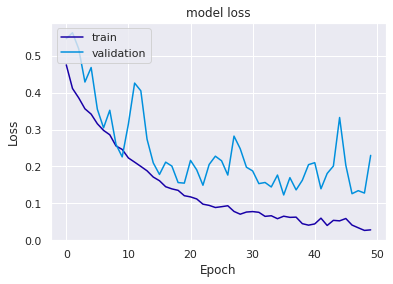

In [144]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.000875, G-Mean=0.718


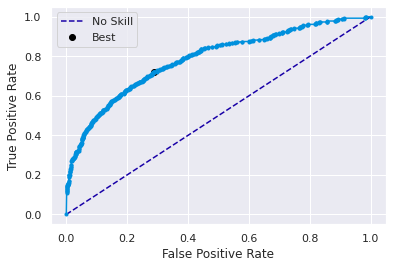

In [145]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [146]:
# Predicting based on best threshold,
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

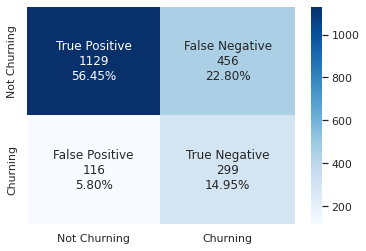

In [147]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [148]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1585
         1.0       0.40      0.72      0.51       415

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000



**Observation on Model 8**

This model with 4 hidden layer using SMOTE to balance data gave a reduced accuracy of 72%, with a decrease in false positive rate to ~5.5% from previous model.

**Final Model - SMOTE with Keras Tuner**

Finally we reached at a model that is not over fit, has a pretty good Recall and Accuracy, and the minimum rate of false positives.

# Building the best model performance


- We analyzed the bank customer data by performing EDA on the data. 
- Using that, we were able to identify certain group indicators that we could use to derive our customer profile and understand our customers better.
- Then we went on to build various neural networks using hidden layers, dropouts, batch normalization, SMOTE, Keras tuner, etc to predict customer churn.
- During each model building, 
  - we ran for 50 epochs, with different parameters for activation, initializer, optimizer, etc. 
  - plotted the train and validation loss to ensure the right fit
  - created the ROC-AUC curve to obtain the best threshold
  - printed the confusion matrix to check our errors
  - printed the performance metrics to check and compare model scores
- We paid close attention to the overall model accuracy, F1 score and false positive rate to make sure that we can reduce our errors.
- Then we did hyperparameter tuning using grid search and random search to get optimal performance
- Next, we also used SMOTE technique to balance out dataset.

Finally we used Keras tuner along with balanced data to reach at our best model and chose results from this model to proceed with generating actionable insights and recommendations for the bank.


# Key Insights

## Insights based on EDA

### Customer Profile Observations

* There appears to be at least 2 broad customer profiles based on the EDA

  * Low Profile Group who are likely to churn

      * Customers with lower account balance of 35k or less
      * Relatively inactive
      * Own fewer number of products
      * Own a credit card 
      * And have a low credit score of 450 or less
      * They are relatively  less than 30 years of age
      * And also have a lesser than 2 years tenure with the bank. 

  * High Profile Group who are not so likely to churn
      * Customers with higher account balance of 35k or more
      * Relatively active
      * Own more than 1 product
      * Do not own a credit card 
      * And have a high credit score of 450 or more
      * They are relatively  more than 30 years of age
      * And also have a more than 2 years tenure with the bank. 
      




### Key Business Objectives

* Bank wants to retain their customer base and predict whether a given customer will leave/churn or not in the next 6 months
- Bank would like to understand the difference between such customers
- And, use this information to better service the 'Churn' customers.

Below would be recommendation to the bank to attain the above objectives,

# Conclusion and Key Takeaways

Based on insights obtained from EDA and considering the objectives for the study, 
- Our `Low Profile` customers with lower account balance of 35k or less, inactive, owning fewer number of products, having a credit card and a low credit score of 450 or less, younger than 30 years with lesser than 2 years tenure with the bank are likely to `churn` more than the others.
- A model tuned using Keras tuner, using balanced dataset using SMOTE, had 121,665 parameters and shows fairly good fit and the least false positives of 5.5% is our `best model`.

Key takeaway for the bank would be,
1. They should target the low profile customers since they have the highest chance of churn.
  - We can provide no fee for low balance so the customers with lower balance do not have to shop for other bank with lesser fee.
  - We can provide complimentary credit score monitoring to help customers manage their score better.
  - We can increase their engagement via phone, in-person etc.
  - We can set up bank sponsored events to offer more products to these customers
  - Since these customers are young, we can offer skill enhancement loans to increase their profile.

2. Next, they should also target our high profile customers so as to retain them.
  - We can offer them incentive for better balance, credit score etc.
  - We can offer better engagement for them so they stay satified with bank service.
  - We can make online transaction services available for easier management of their multiple products.

3. The model could benefit from clarity on the data points and better data context from better understanding of the data extraction process would provide better insight and possibly lead to better results from the machine learning process.